<a href="https://colab.research.google.com/github/Jgabriel1800/estat-stica-varejo/blob/main/estatistica_frequencia_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt

In [16]:
dados=pd.read_csv('/content/vendas_ecommerce.csv')

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2.0,193.60,18.0,1.0
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1.0,247.68,6.0,4.0
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2.0,1254.92,8.0,5.0
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8.0,16200.56,6.0,5.0
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5.0,496.20,13.0,5.0


Não achamos valores nulos

In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31967 entries, 0 to 31966
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_compra          31967 non-null  object 
 1   sexo_biologico     31967 non-null  object 
 2   idade_cliente      31967 non-null  int64  
 3   regiao_cliente     31967 non-null  object 
 4   categoria_produto  31967 non-null  object 
 5   preco_unitario     31966 non-null  float64
 6   quantidade         31966 non-null  float64
 7   total_compra       31966 non-null  float64
 8   tempo_entrega      31966 non-null  float64
 9   avaliacao          31966 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.4+ MB


Analisando quais categorias de produto tem mais vendas

In [20]:
produtos=dados['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,5751
1,"Roupas, Calçados e Acessórios",4394
2,Casa e Mobílias,4143
3,Beleza e Cuidados Pessoais,3561
4,Esporte e Lazer,3244
5,Alimentos e Bebidas,2860
6,Papelaria e Escritório,2270
7,Livros,2229
8,Ferramentas e Construção,1918
9,Brinquedos,1596


<ipython-input-21-f8189ef95daf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


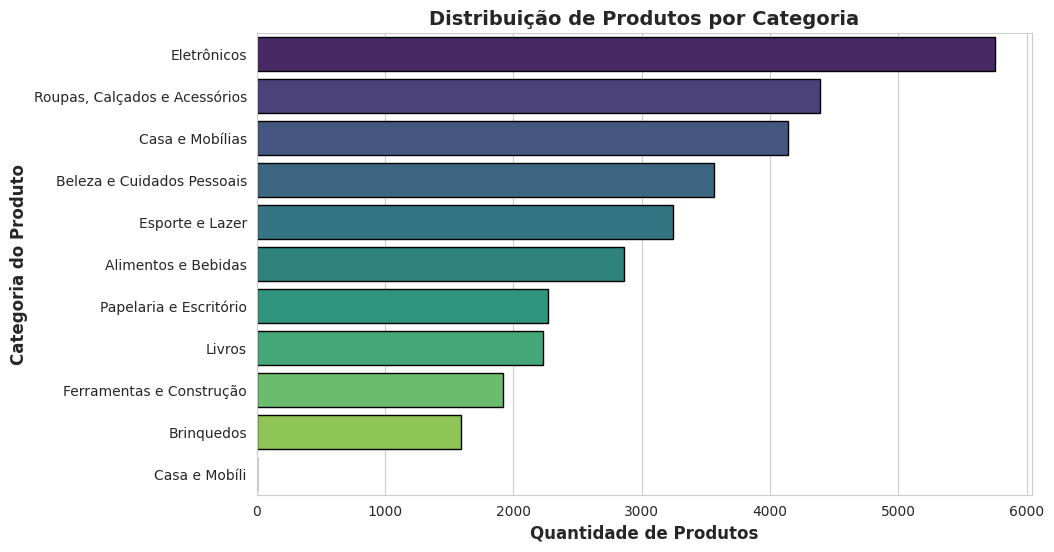

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='count',
    y='categoria_produto',
    data=produtos,
    palette='viridis',
    edgecolor='black'
)
ax.set_xlabel("Quantidade de Produtos", fontsize=12, fontweight='bold')
ax.set_ylabel("Categoria do Produto", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Produtos por Categoria", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**A categoria que mais possui vendas é a de eletrônicos, seguida por roupas,calçados e acessórios e logo após casa e mobílias**

In [22]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2.0,193.60,18.0,1.0
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1.0,247.68,6.0,4.0
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2.0,1254.92,8.0,5.0
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8.0,16200.56,6.0,5.0
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5.0,496.20,13.0,5.0


In [23]:
sorted(dados['avaliacao'].unique())

[np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(nan)]

Criando as categorias

In [24]:
dados['avaliacao indicador']=pd.Categorical(
    dados['avaliacao'], categories=[1,2,3,4,5], ordered=True

)

referenciando os valores as palavras

In [25]:
avaliacao_labels={1:'Péssimo',2:'Ruim',3:'Regular',4:'Bom',5:'Ótimo'}

dados['avaliacao indicador']=dados['avaliacao indicador'].map(avaliacao_labels)

In [26]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2.0,193.60,18.0,1.0,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1.0,247.68,6.0,4.0,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2.0,1254.92,8.0,5.0,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8.0,16200.56,6.0,5.0,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5.0,496.20,13.0,5.0,Ótimo


In [27]:
df_unico=dados[['avaliacao','avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1.0,Péssimo
1,4.0,Bom
2,5.0,Ótimo
8,3.0,Regular
14,2.0,Ruim
31966,NaN,NaN


Analisando a quantidade de produtos vendidos

In [28]:
print("Vendemos de ",dados['quantidade'].min()," a ",dados['quantidade'].max()," unidades de produtos")

Vendemos de  1.0  a  10.0  unidades de produtos


In [29]:
print("Temos produtos com valores a partir de ",dados['total_compra'].min(),'reais até o valor de ',dados['total_compra'].max(),'reais')


Temos produtos com valores a partir de  5.14 reais até o valor de  20581.8 reais


Analisando quais foram as 10 compras mais caras na loja

In [30]:
dados.sort_values('total_compra',ascending=False).head(10)

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10.0,20581.8,4.0,5.0,Ótimo
25798,cbefed8b-db8a-4c26-b7fa-0133cc82dd8d,Masculino,50,Nordeste,Eletrônicos,2012.22,10.0,20122.2,5.0,5.0,Ótimo
24720,54a9c744-4dfe-4943-9166-2448c619e787,Masculino,33,Nordeste,Eletrônicos,2007.45,10.0,20074.5,7.0,5.0,Ótimo
14659,264e4ac4-f29d-4e4a-85b8-5fa1821cacac,Feminino,23,Sudeste,Eletrônicos,1991.83,10.0,19918.3,6.0,5.0,Ótimo
15422,be025c65-3e11-4f02-8c8c-a31a065225e1,Masculino,48,Centro-Oeste,Eletrônicos,1968.61,10.0,19686.1,6.0,5.0,Ótimo
8492,342680fb-e42b-4d92-88d6-5ddbe4d8ff51,Masculino,34,Sudeste,Eletrônicos,1965.13,10.0,19651.3,8.0,4.0,Bom
20222,43247859-c006-481f-8bf5-84336a89a47b,Feminino,19,Sudeste,Eletrônicos,1946.20,10.0,19462.0,5.0,5.0,Ótimo
24353,b7c26a72-7978-4d21-8417-88f4ea6b7d92,Masculino,44,Norte,Eletrônicos,1923.46,10.0,19234.6,9.0,4.0,Bom
8152,dfa82d12-4645-48c7-b921-5282f17634f7,Masculino,36,Centro-Oeste,Eletrônicos,1912.35,10.0,19123.5,11.0,1.0,Péssimo
29992,57af570a-9508-4766-a193-5d0ce5e9a109,Masculino,32,Sudeste,Eletrônicos,1909.98,10.0,19099.8,6.0,3.0,Regular


**Identificando o perfil do público da loja**

Acompanhando as avaliações dos clientes

In [31]:
frequencia_avaliacoes = (
    dados.groupby('avaliacao indicador', observed=False)
    .size()
    .reset_index(name='frequencia_absoluta')
    .sort_values(by='avaliacao indicador', ascending=False)
)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta
4,Ótimo,10574
3,Bom,6607
2,Regular,5142
1,Ruim,4481
0,Péssimo,5162


In [32]:
frequencia_avaliacoes['frequencia relativa']=round((frequencia_avaliacoes['frequencia_absoluta']/
                                                   frequencia_avaliacoes['frequencia_absoluta'].sum())*100,1)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta,frequencia relativa
4,Ótimo,10574,33.1
3,Bom,6607,20.7
2,Regular,5142,16.1
1,Ruim,4481,14.0
0,Péssimo,5162,16.1


In [33]:
frequencia_avaliacoes.columns=['Avaliação','Quantidade','Porcentagem(%)']

Criando o gráfico

<ipython-input-34-41e973015547>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


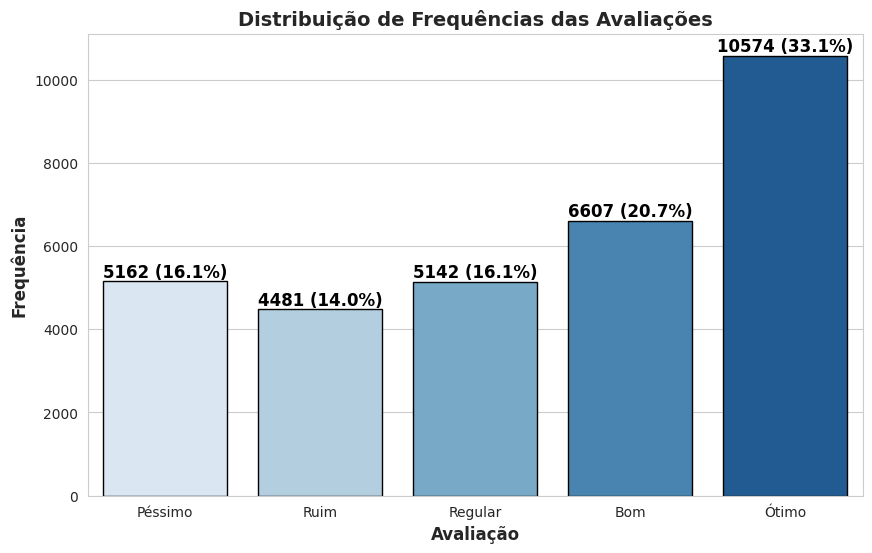

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=frequencia_avaliacoes,
    x='Avaliação',
    y='Quantidade',
    palette='Blues',
    edgecolor='black'
)

for index, row in frequencia_avaliacoes.iterrows():
    ax.text(
        index,
        row['Quantidade'] + 0.5,
        f"{row['Quantidade']} ({row['Porcentagem(%)']:.1f}%)",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

ax.set_xlabel("Avaliação", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequência", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Frequências das Avaliações", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)

plt.yticks(fontsize=10)
plt.show()

**Notamos que a categoria péssimo ficou acima das categorias 'Ruim' e 'Regular' por 2,1% e 0,1% respectivamente**

Analisando as avaliações dos clientes de cada regiao do Brasil

In [35]:
tab_avaliacao_reg=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'])
tab_avaliacao_reg

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,733,1246,432,1648,1103
Ruim,724,1105,405,1374,873
Regular,555,915,625,2154,893
Bom,1152,1868,467,2023,1097
Ótimo,1753,2744,863,3350,1864


In [36]:
tab_avaliacoes_reg_rel=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'],normalize='columns')*100
tab_avaliacoes_reg_rel=round(tab_avaliacoes_reg_rel,1)


tab_avaliacoes_reg_rel

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,14.9,15.8,15.5,15.6,18.9
Ruim,14.7,14.0,14.5,13.0,15.0
Regular,11.3,11.6,22.4,20.4,15.3
Bom,23.4,23.7,16.7,19.2,18.8
Ótimo,35.7,34.8,30.9,31.8,32.0


Vamos analisar quais regiões tem mais avaliações positivas

In [37]:
tab_avaliacoes_filtro=tab_avaliacoes_reg_rel.loc[['Ótimo','Bom']]
resultado=tab_avaliacoes_filtro.sum().sort_values(ascending=False)
resultado

,0
regiao_cliente,
Centro-Oeste,59.1
Nordeste,58.5
Sudeste,51.0
Sul,50.8
Norte,47.6


**As regiões Centro-Oeste e Nordeste tem as duas melhores avaliações com 58.6% e 58.9% respectivamente**

In [38]:
tab_avaliacoes_filtro_negativa=tab_avaliacoes_reg_rel.loc[['Ruim','Péssimo']]
resultado_negativa=tab_avaliacoes_filtro_negativa.sum().sort_values(ascending=False)
resultado_negativa

,0
regiao_cliente,
Sul,33.9
Norte,30.0
Nordeste,29.8
Centro-Oeste,29.6
Sudeste,28.6


**As regiões Sul e Centro-Oeste tem as piores avaliações com 34.3% e 30.1% respectivamente**

Vamos entender como o ticket médio varia entre o gênero e a sua região de residência

In [39]:
ticket_medio=round(pd.crosstab(dados['sexo_biologico'],dados['regiao_cliente'],values=dados['total_compra'],aggfunc='mean'),2)
ticket_medio

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1914.94,1905.73,1777.81,2170.16,2171.06
Masculino,2047.62,2004.91,1819.09,1872.42,1878.08


Observa-se que as pessoas do gênero masculino nas regiões Centro-Oeste e Nordeste, com uma diferença de aproximadamente **150,00** reais.  
Porém, as pessoas do gênero feminino gastam mais do que as pessoas do gênero masculino na região Sul e Sudeste, com uma diferença de aproximadamente **300,00** reais.


Analisando as categorias de produtos que levam mais tempo para serem entregues para serem melhoradas

In [43]:
media_entrega=dados.tempo_entrega.mean()
media_entrega

np.float64(10.04895826815992)

Calculando a média por categorias de produto

In [46]:
media_entrega_categoria=dados.groupby('categoria_produto')['tempo_entrega'].mean().reset_index().round(1)
media_entrega_categoria

,categoria_produto,tempo_entrega
0,Alimentos e Bebidas,7.7
1,Beleza e Cuidados Pessoais,8.8
2,Brinquedos,10.3
3,Casa e Mobíli,NaN
4,Casa e Mobílias,14.4
5,Eletrônicos,7.2
6,Esporte e Lazer,10.7
7,Ferramentas e Construção,13.7
8,Livros,9.5
9,Papelaria e Escritório,12.0


In [51]:
media_entrega_categoria.columns=['categoria_produto','media_tempo']

media_entrega_categoria=media_entrega_categoria.sort_values(by='media_tempo',ascending=False)
media_entrega_categoria.drop(media_entrega_categoria[media_entrega_categoria['categoria_produto'] == 'Casa e Mobíli'].index, inplace=True)
media_entrega_categoria

,categoria_produto,media_tempo
4,Casa e Mobílias,14.4
7,Ferramentas e Construção,13.7
9,Papelaria e Escritório,12.0
6,Esporte e Lazer,10.7
2,Brinquedos,10.3
8,Livros,9.5
10,"Roupas, Calçados e Acessórios",9.3
1,Beleza e Cuidados Pessoais,8.8
0,Alimentos e Bebidas,7.7
5,Eletrônicos,7.2


<ipython-input-57-25fb9cd6cf93>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


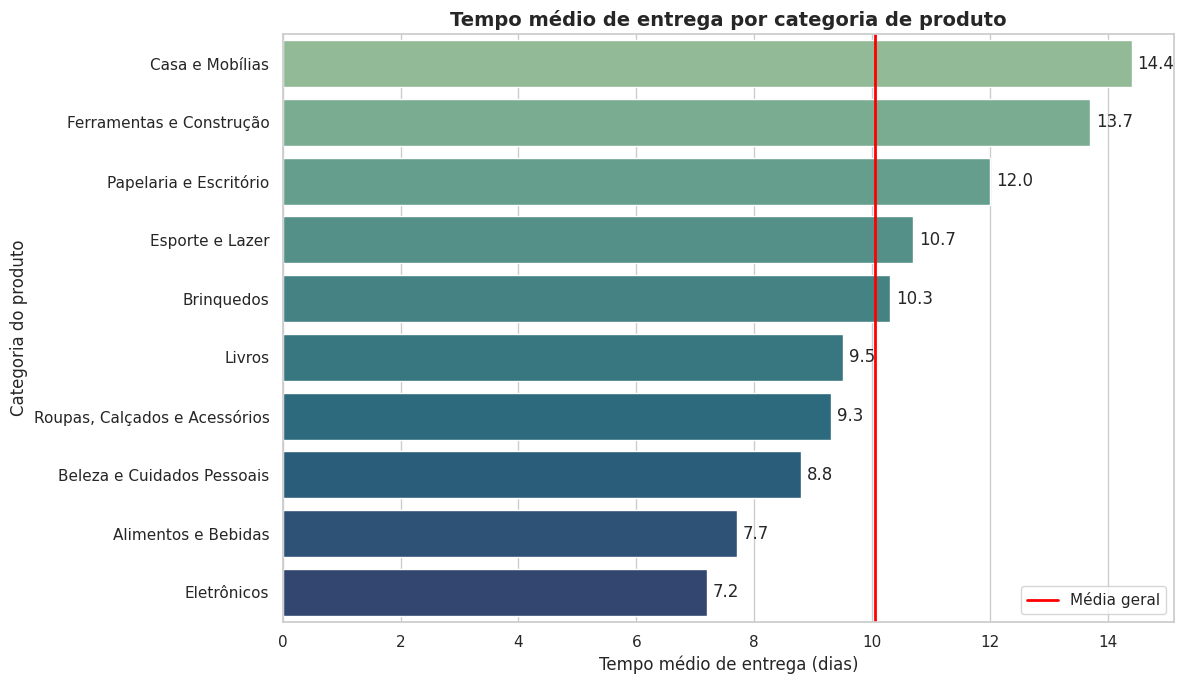

In [57]:
sns.set(style='whitegrid')
media_entrega_categoria_sorted = media_entrega_categoria.sort_values('media_tempo', ascending=False)
plt.figure(figsize=(12, 7))

sns.barplot(
    data=media_entrega_categoria_sorted,
    x='media_tempo',
    y='categoria_produto',
    palette="crest"
)

plt.axvline(media_entrega, color='red',  linewidth=2, label='Média geral')

for i, (tempo, categoria) in enumerate(zip(media_entrega_categoria_sorted['media_tempo'], media_entrega_categoria_sorted['categoria_produto'])):
    plt.text(tempo + 0.1, i, f"{tempo:.1f}", va='center')

plt.xlabel('Tempo médio de entrega (dias)', fontsize=12)
plt.ylabel('Categoria do produto', fontsize=12)
plt.title('Tempo médio de entrega por categoria de produto', fontsize=14, weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

Analisamos que produtos como: Casa e Mobílias, Ferramentas e Construção, Papelaria e Escritório, Esport e Lazer e Brinquedos estão acima da média do tempo de entrega, logo isso pode afetar na sua quantidade de vendas dos produtos

Vamos analisar as vendas de eletrônicos na região Nordeste. A equipe deseja entender melhor a distribuição dos valores de vendas para ajustar sua estratégia de preços e campanhas

In [60]:
eletronicos_nordeste=dados[(dados['regiao_cliente']=='Nordeste') & (dados['categoria_produto']=='Eletrônicos')]
eletronicos_nordeste=eletronicos_nordeste.sort_values('total_compra')
eletronicos_nordeste.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
29317,23e748d7-2f72-4c3c-97ce-ac9fc5624ea8,Feminino,39,Nordeste,Eletrônicos,32.92,1.0,32.92,6.0,2.0,Ruim
23089,b0a8ed6e-49be-43f1-86db-3808fc34c0c7,Feminino,29,Nordeste,Eletrônicos,22.05,2.0,44.10,6.0,5.0,Ótimo
20536,578c771c-de26-4699-97fb-c8397e19eb04,Masculino,51,Nordeste,Eletrônicos,61.43,1.0,61.43,7.0,5.0,Ótimo
7863,29d21514-3fdf-4bac-ab90-6d860e7a1854,Feminino,23,Nordeste,Eletrônicos,74.86,1.0,74.86,7.0,5.0,Ótimo
26822,c746b2d9-c131-48fd-afdc-1d8a34fb5f1d,Feminino,27,Nordeste,Eletrônicos,90.92,1.0,90.92,10.0,2.0,Ruim


In [65]:
eletronicos_nordeste.total_compra.median()

3136.8

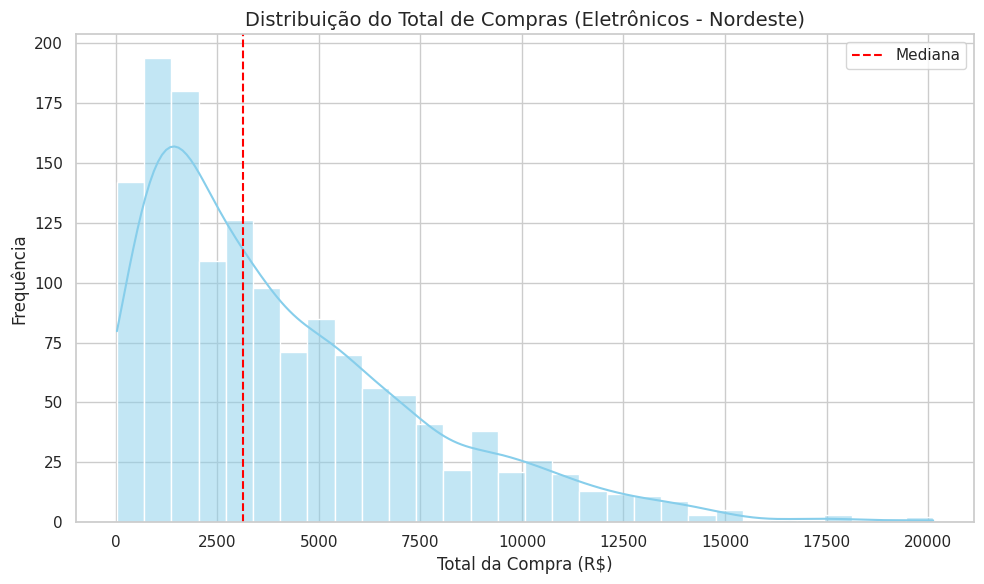

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(eletronicos_nordeste['total_compra'], bins=30, kde=True, color='skyblue')
plt.axvline(eletronicos_nordeste['total_compra'].median(), color='red', linestyle='--', label='Mediana')

plt.title('Distribuição do Total de Compras (Eletrônicos - Nordeste)', fontsize=14)
plt.xlabel('Total da Compra (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

A mediana indica que metade dos cliente gastam até **3.137,00 reais** em produtos eletrônicos

Analisando a quantidade de livros mais compradas pelos clientes, para entender a oferta e demanda

In [70]:
dados['regiao_cliente'].value_counts()

,count
regiao_cliente,
Sudeste,10549
Nordeste,7879
Sul,5830
Centro-Oeste,4917
Norte,2792


In [71]:
dados_filtrados=dados[dados['categoria_produto']=='Livros']
dados_filtrados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
11,b0494b41-df5b-488f-b305-43dda2916737,Feminino,24,Centro-Oeste,Livros,300.07,2.0,600.14,10.0,4.0,Bom
60,7c1da24d-871d-4a84-a21b-b25ad422676a,Masculino,44,Sudeste,Livros,177.15,2.0,354.30,11.0,1.0,Péssimo
61,7dd0a745-207a-41bc-a3bf-c5ff6e1cd274,Masculino,47,Sudeste,Livros,354.72,1.0,354.72,9.0,3.0,Regular
83,fa44d7e6-e17b-4fef-8326-e9b3035699e5,Masculino,35,Sul,Livros,116.94,3.0,350.82,16.0,3.0,Regular
92,399a3765-c43e-434f-b9eb-8cb7eb4a21ff,Feminino,26,Sul,Livros,129.11,4.0,516.44,10.0,4.0,Bom


In [73]:
moda=dados_filtrados.quantidade.mode()
moda

,quantidade
0,4.0


Descobrimos que a quantidade de livro que os clientes mais compram na loja são de **4 livros**  por compra

Vamos investigar as avaliações e sua relação com o tempo de entrega

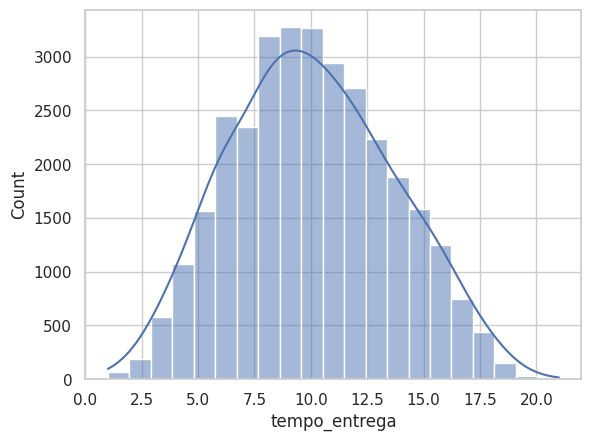

In [74]:
sns.histplot(bins=21,data=dados,x='tempo_entrega',kde=True,kde_kws={'bw_adjust':2})
plt.show()

Pelo gráfico nota-se que ele é simetrico, logo a média,mediana e moda tem valores semelhantes

In [76]:
resumo_tempo_entrega={
    'media':dados['tempo_entrega'].mean(),
    'mediana':dados['tempo_entrega'].median(),
    'moda':dados['tempo_entrega'].mode()[0]
}
resumo_tempo_entrega



{'media': np.float64(10.04895826815992),
 'mediana': 10.0,
 'moda': np.float64(9.0)}

Confirmando que os valores são praticamente iguais

In [77]:
dados_nota_5=dados[dados['avaliacao']==5]
dados_nota_5.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2.0,1254.92,8.0,5.0,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8.0,16200.56,6.0,5.0,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5.0,496.20,13.0,5.0,Ótimo
5,bbbaecc2-2d97-4c02-a69c-77ccfb2c8a26,Masculino,29,Nordeste,Beleza e Cuidados Pessoais,131.20,1.0,131.20,13.0,5.0,Ótimo
6,923d6915-1488-485b-9398-4fbcf7146496,Masculino,44,Centro-Oeste,Casa e Mobílias,909.83,2.0,1819.66,14.0,5.0,Ótimo


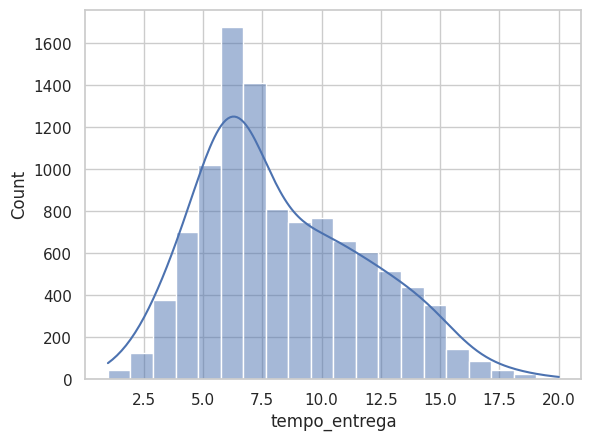

In [80]:
sns.histplot(bins=20,data=dados_nota_5,x='tempo_entrega',kde=True,kde_kws={'bw_adjust':2})
plt.show()

Percebemos no gráfico uma assimetria para a esquerda

In [81]:
resumo_tempo_entrega={
    'media':dados_nota_5['tempo_entrega'].mean(),
    'mediana':dados_nota_5['tempo_entrega'].median(),
    'moda':dados_nota_5['tempo_entrega'].mode()[0]
}
resumo_tempo_entrega

{'media': np.float64(8.329392850387743),
 'mediana': 7.0,
 'moda': np.float64(6.0)}